<a href="https://colab.research.google.com/github/RenarFox/ML_UUNIT/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом домашнем задании вам предстоит с помощью Pandas ответить на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult). Все ответы вам предстоит отправить в этой [форме](https://forms.gle/qfVth9BygS4AVJZ47)

Чтобы начать надо сохранить этот ноутбук себе на диск (File - Save a copy in Drive) или скачать (File - Download), если вы делаете у себя локально.

Скачать нужный датасет можно [тут](https://disk.yandex.ru/d/6WlIXR-y_PObLg)

Эта домашняя работа легкая и покрывает лишь некоторую базу, очень советую пройтись по доп.материалам и посмотреть на различные крутые штуки, которые может делать Pandas, Matplotlib или Seaborn. Особенно если вы хотите заниматься анализом данных намного серьезнее.

Мягкий дедлайн: 31 октября 23:59 \
Жесткий дедлайн: 7 ноября 23:59

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [ ]:
# Write code here
df = pd.read_csv("adult_data.csv")
print(df.head)

<bound method NDFrame.head of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Ma

**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [ ]:
# Write code here
df['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


**Задание 2: Найдите средний возраст мужчин**

In [ ]:
# Write code here
df.loc[df['sex'] == 'Male', 'age'].mean()

np.float64(39.43354749885268)

**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [ ]:
# Write code here
percent = (df['native-country']== 'Taiwan').mean() *100
print(f"Процент граждан Тайваня: {percent: .2f}%")

Процент граждан Тайваня:  0.16%


**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
df.loc[df['salary']=='>50K']
print(df['age'].mean())

38.58164675532078


**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
df.loc[df['salary']=='>50K']
print(df['age'].std())

13.640432553581146


**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [ ]:
# Write code here
all_above_bachelors = ((df['salary'] == '>50K') & (~df['education'].isin(['Bachelors+', 'HS-grade', '11th']))).sum() == 0
print(all_above_bachelors)


False


**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [ ]:
# Write code here
wu4 = ((df['native-country']=='United-States') & (df['hours-per-week'] == '40') & (df['salary']=='<=50K')).value_counts()
print(wu4)

False    32561
Name: count, dtype: int64


**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), а потом посмотрим, сколько человек работают столько времени в неделю и зарабатывают <=50K**

In [ ]:
# Write code here
mh = df['hours-per-week'].max()
print(mh)
pw = ((df['salary'] == '<=50K')&mh).value_counts()
print(pw)

99
salary
True     24720
False     7841
Name: count, dtype: int64


**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

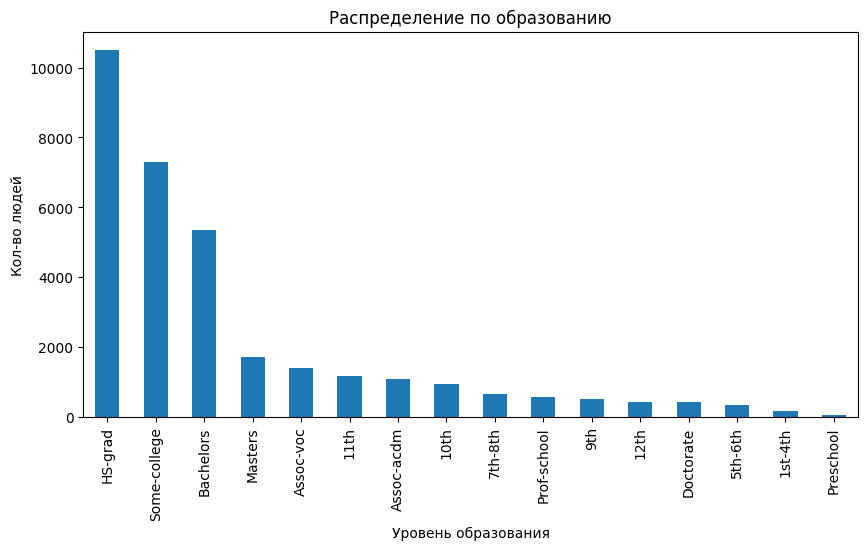

In [ ]:
# Write code here
df['education'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Распределение по образованию')
plt.xlabel('Уровень образования')
plt.ylabel('Кол-во людей')
plt.show()

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib)
P.S. Необязательное задание, хотя лучше сделать, если собираетесь сдавать до мягкого, я хоты бы посмотрю**

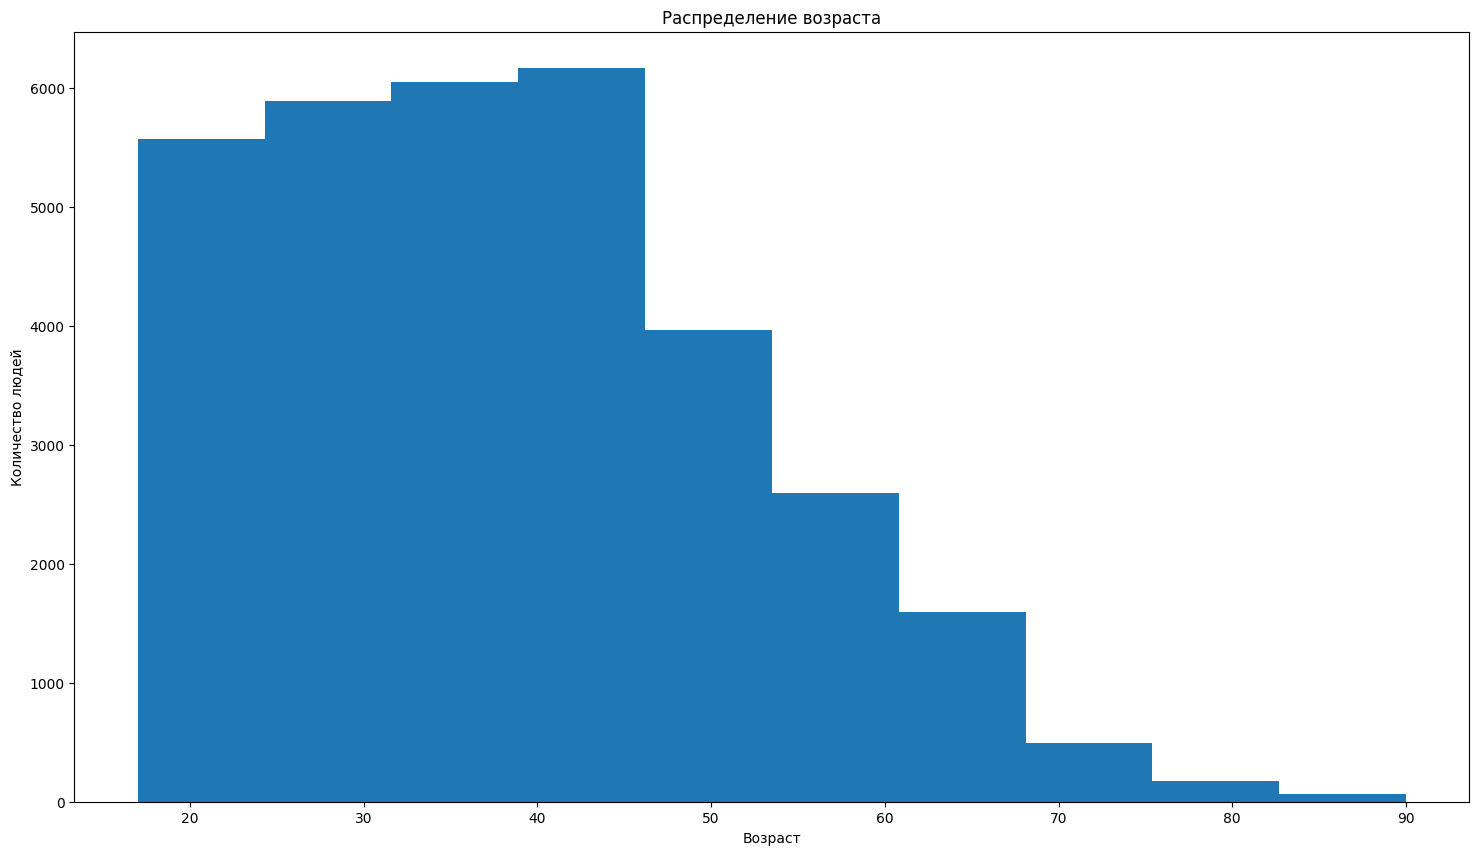

Количество возрастных отрезков с >1600 наблюдений: 6


In [ ]:
# Write code here
import matplotlib.pyplot as plt

counts, bins, patches = plt.hist(df['age'], bins=10)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()
num_bins_over_1600 = np.sum(counts > 1600)
print(f"Количество возрастных отрезков с >1600 наблюдений: {num_bins_over_1600}")